<a href="https://www.kaggle.com/code/palpriyanshu/cat-vs-dog-classifier?scriptVersionId=292952459" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat/animals/dog/00985-127787239.png
/kaggle/input/dog-vs-cat/animals/dog/00667-3846168829.png
/kaggle/input/dog-vs-cat/animals/dog/00891-3846169053.png
/kaggle/input/dog-vs-cat/animals/dog/00528-3846168690.png
/kaggle/input/dog-vs-cat/animals/dog/00689-3846168851.png
/kaggle/input/dog-vs-cat/animals/dog/00593-3846168755.png
/kaggle/input/dog-vs-cat/animals/dog/00894-3846169056.png
/kaggle/input/dog-vs-cat/animals/dog/00622-3846168784.png
/kaggle/input/dog-vs-cat/animals/dog/00907-3846169069.png
/kaggle/input/dog-vs-cat/animals/dog/00983-127787237.png
/kaggle/input/dog-vs-cat/animals/dog/00817-3846168979.png
/kaggle/input/dog-vs-cat/animals/dog/00576-3846168738.png
/kaggle/input/dog-vs-cat/animals/dog/00620-3846168782.png
/kaggle/input/dog-vs-cat/animals/dog/00940-3846169102.png
/kaggle/input/dog-vs-cat/animals/dog/00931-3846169093.png
/kaggle/input/dog-vs-cat/animals/dog/00904-3846169066.png
/kaggle/input/dog-vs-cat/animals/dog/00996-127787250.png
/kaggle/input/dog

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten
#generator
train_ds = keras.utils.image_dataset_from_directory(

    directory='/kaggle/input/dog-vs-cat/animals',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_ds = keras.utils.image_dataset_from_directory(

    directory='/kaggle/input/dog-vs-cat/animals',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

2026-01-20 16:11:26.087072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768925486.532322      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768925486.643057      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768925487.644477      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768925487.644529      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768925487.644532      24 computation_placer.cc:177] computation placer alr

Found 1000 files belonging to 2 classes.


I0000 00:00:1768925507.654498      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768925507.658380      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 1000 files belonging to 2 classes.


In [3]:
#normalize
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [4]:
#CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [7]:
history=model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


I0000 00:00:1768925512.719190      73 service.cc:152] XLA service 0x7c1a38004d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768925512.719232      73 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1768925512.719237      73 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1768925513.373711      73 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-20 16:11:57.593483: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-20 16:11:57.887080: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 3/32 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5139 - loss: 1.4354

I0000 00:00:1768925521.056313      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 374ms/step - accuracy: 0.5606 - loss: 0.9956 - val_accuracy: 0.8460 - val_loss: 0.4467
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.8206 - loss: 0.4289 - val_accuracy: 0.9270 - val_loss: 0.2123
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.8973 - loss: 0.2526 - val_accuracy: 0.9720 - val_loss: 0.0888
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.9640 - loss: 0.0972 - val_accuracy: 0.9980 - val_loss: 0.0344
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.9759 - loss: 0.0673 - val_accuracy: 0.9970 - val_loss: 0.0083
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.9950 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.9981 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val

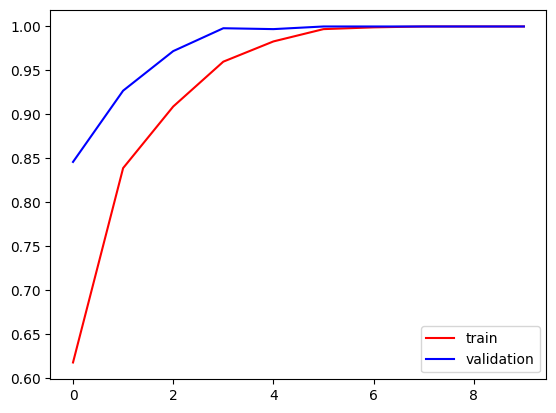

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

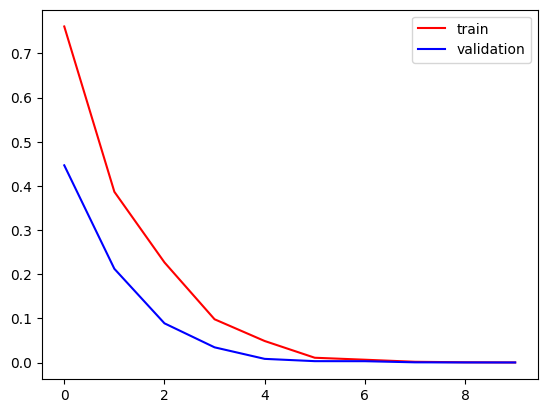

In [9]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()